## Loading Data into Pandas DataFrame

In [1]:
#Mount Drive for legible/accessible filepath of tweet data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Load tweet data into a dataframe
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1u8_U2v3znSsfJ73iZpoub_Qy5dmMz6xsdVV08qlbJkM/export?format=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Response ID,Are you an existing LiveRamp Employee?,What LiveRamp products do you directly use? (select all that apply) - Connect/Activation,What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement,What LiveRamp products do you directly use? (select all that apply) - Advanced TV,What LiveRamp products do you directly use? (select all that apply) - Safe Haven,What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS,What LiveRamp products do you directly use? (select all that apply) - Data Plus Math,What LiveRamp products do you directly use? (select all that apply) - Data Marketplace,What LiveRamp products do you directly use? (select all that apply) - Onboarding,...,"Provide more details about your concerns. What, if anything, might alleviate these concerns?",Rank the importance of the following for future LiveRamp AI products. - I want to know how AI features work,Rank the importance of the following for future LiveRamp AI products. - I want to know <strong>how</strong> data is used to power AI,Rank the importance of the following for future LiveRamp AI products. - I want to know how data privacy is maintained,Rank the importance of the following for future LiveRamp AI products. - I want to know <strong>what</strong> data is used to power AI,"How concerned are you, if at all, about potential biases in AI algorithms, particularly in the context of customer segmentation or personalized marketing? \n\n\n\nBiases in AI algorithms are the tendencies of the algorithms to produce results that are unfair, inaccurate, or discriminatory toward certain groups of people.",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,How comfortable or uncomfortable are you with the idea of AI providing suggestions within customers' LiveRamp accounts to improve their user experience?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,"Please share any additional thoughts or suggestions regarding data privacy, fairness, transparency, and ethical considerations in AI-powered products."
0,R_2DOCRsNhIAPNuo1,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,3.0,1.0,4.0,8.0,13.0,12.0,I think all basic tasks that can be sped up wi...
1,R_1roWjmvL2ZeH4vZ,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,4.0,3.0,1.0,2.0,4.0,6.0,12.0,10.0,NaN
2,R_1gin6fsy7L0BpD0,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,Data security and private relay for PII data,3.0,4.0,1.0,2.0,5.0,6.0,11.0,11.0,NaN
3,R_21pQK5Od5CQ6CSc,2,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,Having transparency into how the AI is making ...,4.0,2.0,1.0,3.0,5.0,7.0,13.0,12.0,"Overall, I'm a strong advocate for use of AI i..."
4,R_wQTxmNjPg6z03ap,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,2.0,1.0,4.0,7.0,12.0,12.0,NaN


In [4]:
df.columns

Index(['Response ID', 'Are you an existing LiveRamp Employee?',
       'What LiveRamp products do you directly use? (select all that apply) - Connect/Activation',
       'What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement',
       'What LiveRamp products do you directly use? (select all that apply) - Advanced TV',
       'What LiveRamp products do you directly use? (select all that apply) - Safe Haven',
       'What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS',
       'What LiveRamp products do you directly use? (select all that apply) - Data Plus Math',
       'What LiveRamp products do you directly use? (select all that apply) - Data Marketplace',
       'What LiveRamp products do you directly use? (select all that apply) - Onboarding',
       'What LiveRamp products do you directly use? (select all that apply) - Data Collaboration Platform / Clean Room',
       'What LiveRamp products do you directly use

## Product Users
Since the product usage question (i.e. "What LiveRamp products do you directly use?") is multi-select, the results shown were percentage of respondents that use each product. I want to bucket certain products together (i.e. technical products vs non-technical products) to see the percentage of respondents who use each (i.e. product `x` OR product `y` OR product `z` vs. product `a` OR product `b` OR product `c`).

In [22]:
connect = "What LiveRamp products do you directly use? (select all that apply) - Connect/Activation"
onboarding = "What LiveRamp products do you directly use? (select all that apply) - Onboarding"
marketplace = "What LiveRamp products do you directly use? (select all that apply) - Data Marketplace"
tv = "What LiveRamp products do you directly use? (select all that apply) - Advanced TV"

low_tech_products_logic = (df[connect] == 1) | (df[onboarding] == 1) | (df[marketplace] == 1)
low_tech_product_users = len(df[low_tech_products_logic]['Response ID'].value_counts())
print("Percentage of respondents using LiveRamp flagship products")
print(100*low_tech_product_users/len(df))

Percentage of respondents using LiveRamp flagship products
65.19685039370079


In [23]:
measure = "What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement"
safehaven = "What LiveRamp products do you directly use? (select all that apply) - Safe Haven"

med_tech_products_logic = (df[measure] == 1) | (df[safehaven] == 1)
med_tech_product_users = len(df[med_tech_products_logic]['Response ID'].value_counts())
print("Percentage of respondents using medium technical LiveRamp products")
print(100*med_tech_product_users/len(df))

Percentage of respondents using medium technical LiveRamp products
33.22834645669291


In [24]:
id = "What LiveRamp products do you directly use? (select all that apply) - Identity Resolution"
colab = "What LiveRamp products do you directly use? (select all that apply) - Data Collaboration Platform / Clean Room"
ats = "What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS"
data = "What LiveRamp products do you directly use? (select all that apply) - Data Plus Math"

high_tech_products_logic = (df[id] == 1) | (df[colab] == 1) | (df[ats] == 1) | (df[data] == 1)
high_tech_product_users = len(df[high_tech_products_logic]['Response ID'].value_counts())
print("Percentage of respondents using technical LiveRamp products")
print(100*high_tech_product_users/len(df))

Percentage of respondents using technical LiveRamp products
25.826771653543307


## Other AI Tools
The free responses for the question of what AI tools respondents have used/experimented weren't visible in Qualtrics if they selected `Other`. Print out the text they inputed.

In [13]:
# Create variables for the column names
chatgpt = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - ChatGPT"
midjourney = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Midjourney"
dalle = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - DALL·E"
medlm = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - MedLM"
bard = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Bard"
other = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Other (please specify)"
none = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - None."

only_chatgpt_logic = (df[chatgpt] == 1) & (df[none].isna()) & (df[other].isna()) & (df[midjourney].isna()) & (df[dalle].isna()) & (df[medlm].isna()) & (df[bard].isna())
only_chatgpt_users = len(df[only_chatgpt_logic]['Response ID'].value_counts())
print("# of respondents that only use chatgpt")
print(only_chatgpt_users)

# of respondents that only use chatgpt
307


In [25]:
ai_other = "What generative AI programs have you used or experimented with?(Please select all that apply) - Other (please specify) - Text"
df[(df[ai_other].notnull())][ai_other]

27     Bard, GitHub CoPilot, Microsoft CoPilot, Datab...
43                                                 Bards
59                                                  Bard
65                                                  grok
69                                                  Bard
70              Built-in programs within BI applications
76                                                  Bard
110                                        Google's Bard
113                                                 Bard
117                                                 Bard
138                                          Google bard
205                                              copilot
222                                         Claude, Bard
240                                                 bard
256                                                 Bard
309                                LLM on internal tools
351                                        Duet, Copilot
365                            

## Hypothesis Testing

### Data Pre-Processing
To analyze the correlation between AI concern and technical proficiency / prior AI exposure, select the columns of the dataframe that are relevant to our variables: `ai_attitude`, `tech_proficiency`, `ai_experience`.

To deduce these variables, we will use responses to certain survey questions as proxies.

#### AI Attitude
There are few questions that are relevant to representing our respondents AI attitudes around concerns and willingness to adopt AI. The questions, with their response scale in brackets and its Qualtrics coded value in parentheses are listed below:

*   'How concerned are you, if at all, about the use of AI in LiveRamp's products?' --> [very concerned (11), not concerned (15)]
*   'Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?' --> [strongly disagree (4), strongly agree (8)]
*   'How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?' --> [uncomfortable (9), comfortable (13)]
*   'Do you agree or disagree that the risks of AI being used in LiveRamp outweigh the potential benefits?' --> [strongly disagree (4), strongly agree (8)]

In [26]:
#Create variables to easily access the relevant columns
ai_concern = "How concerned are you, if at all, about the use of AI in LiveRamp's products?"
benefit_over_risk = "Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?"
risk_over_benefit = "Do you agree or disagree that the risks of AI being used in LiveRamp outweigh the potential benefits?"
ai_comfort = "How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?"

In [27]:
df[[ai_concern, benefit_over_risk, risk_over_benefit, ai_comfort]].head()

,"How concerned are you, if at all, about the use of AI in LiveRamp's products?",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,Do you agree or disagree that the risks of AI being used in LiveRamp outweigh the potential benefits?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?
0,14.0,8.0,NaN,12.0
1,13.0,6.0,NaN,10.0
2,11.0,6.0,NaN,11.0
3,12.0,7.0,NaN,12.0
4,15.0,7.0,NaN,12.0


Recode the values from Qualtrics, our survey tool, to be mapped to [1, 5] where 1 denotes more concern / hestitation towards AI and 5 denotes more acceptance and willingness to adopt.  

In [28]:
# For ai_concern, we only need to subtract the difference between the original scale [11, 15] and our desired scale [1, 5]
df[ai_concern] = df[ai_concern].apply(lambda x: x - 10 if pd.notnull(x) else x)

# For benefit_over_risk, we only need to subtract the difference between the original scale [4, 8] and our desired scale [1, 5]
df[benefit_over_risk] = df[benefit_over_risk].apply(lambda x: x - 3 if pd.notnull(x) else x)

#For ai_comfort, we only need to subtract the difference between the original scale [9, 13] and our desired scale

# For the risk_over_benefit column, our scale needs to be inverted so we use a mapping dictionary instead
mapping_dict = {8: 1, 7: 2, 6: 3, 5: 4, 4: 5}
df[risk_over_benefit] = df[risk_over_benefit].map(mapping_dict)

# Display the updated DataFrame
df[[ai_concern, benefit_over_risk, risk_over_benefit]]

,"How concerned are you, if at all, about the use of AI in LiveRamp's products?",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,Do you agree or disagree that the risks of AI being used in LiveRamp outweigh the potential benefits?
0,4.0,5.0,NaN
1,3.0,3.0,NaN
2,1.0,3.0,NaN
3,2.0,4.0,NaN
4,5.0,4.0,NaN
...,...,...,...
630,NaN,NaN,NaN
631,NaN,NaN,NaN
632,NaN,NaN,NaN
633,2.0,NaN,4.0


#### Tech Proficiency
For `tech_proficiency`, we will create a scale of [0 - 2], where 0 denotes less technical proficiency, 1 denotes medium proficiency, and 2 denotes high proficiency. The survey question that surveys as a proxy for this will be our question on job function. This was a selected choice question with 15 options, one being `Other` which the respondent would then further specify.  

The question on job function is: "Which one of these options best describes your primary role or responsibilities ? - Selected Choice." The numeric responses (which we show with the choice text for legibility) will be sorted into the technical proficiency classes 0, 1, or 2 based on our subject matter knowledge of the technical requirements of that job. For instance, a data scientist will be sorted into class 2 since their job requires coding, data analysis, etc. while a marketer will be sorted into class 0 since their job is less likely to interface with these type of technical elements.

**0 - Low technical proficiency**
* 5 - Marketing
* 11 - Human Resources
* 14 - Business Administration & Strategy
* 17 - Legal
* 8 - Sales
* 6 - Customer Support
* 19 - Data Ethics

**1 - Medium technical proficiency**
* 13 - Operations
* 7 - Technical Writing
* 1 - Product Management
* 4 - Product Design

**2 - High technical proficiency**
* 9 - Engineering
* 10 - Data Science / Statistics Analytics

For ease of analysis, we will not consider 16 - Executives (since they could vary in technical proficiency depending on whether they are a CTO or CMO) or 18 - Other.

In [29]:
# Mapping job function responses to our technical proficiency scale
job_function = "Which one of these options best describes your primary role or responsibilities ? - Selected Choice"

# Define the lists of job functions corresponding to low, medium, and high tech proficiency
low_tech_proficiency = [5,11,14,17,8,6,19]
med_tech_proficiency = [13,7,1,4]
high_tech_proficiency = [9,10]

# Define a function to map job functions to tech proficiency levels
def map_tech_proficiency(job_function):
    if job_function in low_tech_proficiency:
        return 0
    elif job_function in med_tech_proficiency:
        return 1
    elif job_function in high_tech_proficiency:
        return 2
    else:
        return None  # Handle cases where job function doesn't match any list

# Create a new column 'tech_proficiency' based on the mapping function
df['tech_proficiency'] = df[job_function].apply(map_tech_proficiency)

# Display the updated DataFrame
df[[job_function,'tech_proficiency']]

,Which one of these options best describes your primary role or responsibilities ? - Selected Choice,tech_proficiency
0,5.0,0.0
1,10.0,2.0
2,10.0,2.0
3,16.0,NaN
4,5.0,0.0
...,...,...
630,9.0,2.0
631,16.0,NaN
632,10.0,2.0
633,4.0,1.0


An alternative survey question that could serve as a proxy for this variable is our product usage question. This was a multi-choice question with 10 options. The question on product usage is: "Which one of these options best describes your primary role or responsibilities ? - Selected Choice." The numeric responses (which we show with the choice text for legibility) will be sorted into the technical proficiency classes 0, 1, or 2 based on the technical interactions that product contains. For instance, our Clean Room product is meant for data analysis and building SQL queries, so users of that product will be sorted into class 2 (high technical proficiency). Our Connect product on the other hand is all UI based and meant to serve marketers trying to build advertising segments, so users of thisproduct will be sorted into class 0.

**0 - Low technical proficiency**
* 1 - Connect/Activation
* 8 - Onboarding
* 7 - Data Marketplace
* 3 - Advanced TV

**1 - Medium technical proficiency**
* 2 - Connect/Measurement
* 4 - Safe Haven

**2 - High technical proficiency**
* 5 - Privacy Manager/ATS
* 9 - Data Collaboration Platform / Clean Room
* 6 - Data Plus Math
* 11 - Identity Resolution


For ease of analysis, we will not consider those who responded with option 10 - "None. I don't use LiveRamp products directly."

In [30]:
# Use the existing logic scaffolding out product users to map product usage to technical proficiency
# Since this is multi-select, let usage of high tech products trump usage of low tech products
# Meaning that a user that uses both low tech and high tech products, will be assigned value 2
df.loc[low_tech_products_logic, 'tech_proficiency_product'] = 0
df.loc[med_tech_products_logic, 'tech_proficiency_product'] = 1
df.loc[high_tech_products_logic, 'tech_proficiency_product'] = 2

# Display the updated DataFrame
df.head()

,Response ID,Are you an existing LiveRamp Employee?,What LiveRamp products do you directly use? (select all that apply) - Connect/Activation,What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement,What LiveRamp products do you directly use? (select all that apply) - Advanced TV,What LiveRamp products do you directly use? (select all that apply) - Safe Haven,What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS,What LiveRamp products do you directly use? (select all that apply) - Data Plus Math,What LiveRamp products do you directly use? (select all that apply) - Data Marketplace,What LiveRamp products do you directly use? (select all that apply) - Onboarding,...,Rank the importance of the following for future LiveRamp AI products. - I want to know <strong>how</strong> data is used to power AI,Rank the importance of the following for future LiveRamp AI products. - I want to know how data privacy is maintained,Rank the importance of the following for future LiveRamp AI products. - I want to know <strong>what</strong> data is used to power AI,"How concerned are you, if at all, about potential biases in AI algorithms, particularly in the context of customer segmentation or personalized marketing? \n\n\n\nBiases in AI algorithms are the tendencies of the algorithms to produce results that are unfair, inaccurate, or discriminatory toward certain groups of people.",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,How comfortable or uncomfortable are you with the idea of AI providing suggestions within customers' LiveRamp accounts to improve their user experience?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,"Please share any additional thoughts or suggestions regarding data privacy, fairness, transparency, and ethical considerations in AI-powered products.",tech_proficiency,tech_proficiency_product
0,R_2DOCRsNhIAPNuo1,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,3.0,1.0,4.0,5.0,13.0,12.0,I think all basic tasks that can be sped up wi...,0.0,1.0
1,R_1roWjmvL2ZeH4vZ,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,4.0,3.0,12.0,10.0,NaN,2.0,1.0
2,R_1gin6fsy7L0BpD0,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,1.0,2.0,5.0,3.0,11.0,11.0,NaN,2.0,1.0
3,R_21pQK5Od5CQ6CSc,2,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,2.0,1.0,3.0,5.0,4.0,13.0,12.0,"Overall, I'm a strong advocate for use of AI i...",NaN,2.0
4,R_wQTxmNjPg6z03ap,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,2.0,1.0,4.0,4.0,12.0,12.0,NaN,0.0,1.0


#### AI Experience
For `ai_experience`, we will create a scale of [0 - 2] similar to `tech_proficiency`, where 0 denotes little to no experience with AI tools and 2 denotes more experience with AI tools.

**0 - Low AI experience**
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - None.'

**1 - Medium AI experience**
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - ChatGPT'
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Midjourney'
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - DALL·E'

**2 - High AI experience**
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - MedLM',
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Bard',
* 'What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Other (please specify)',

We bucket responses in this way due to the mainstream popularity of ChatGPT and MidJourney in addition to our survey results showing that 80% of respondents have used ChatGPT. We consider then that the use of another (less mainstream) AI product to be an indication of further AI exposure.

In [31]:
# Create variables for the column names
chatgpt = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - ChatGPT"
midjourney = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Midjourney"
dalle = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - DALL·E"
medlm = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - MedLM"
bard = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Bard"
other = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - Other (please specify)"
none = "What generative AI programs have you used or experimented with?(Please select all that apply) - Selected Choice - None."

# Create logic to scaffold out AI tool usage
low_ai_exp_logic = (df[none] == 1)
med_ai_exp_logic = (df[chatgpt] == 1) | (df[midjourney] == 1) | (df[dalle] == 1)
high_ai_exp_logic = (df[medlm] == 1) | (df[bard] == 1) | (df[other] == 1) #| (df[midjourney] == 1) | (df[dalle] == 1)

# Since this is multi-select, let usage of less mainstream AI tools trump usage of mainstream AI tools i.e. ChatGPT
# Meaning that a user that uses could be 1 or 2 in terms of ai_experience will end up being assigned value 2
df.loc[low_ai_exp_logic, 'ai_experience'] = 0
df.loc[med_ai_exp_logic, 'ai_experience'] = 1
df.loc[high_ai_exp_logic, 'ai_experience'] = 2

# Check the number of respondents are in each group
print("low ", len(df[df['ai_experience'] == 0]))
print("med ", len(df[df['ai_experience'] == 1]))
print("high ", len(df[df['ai_experience'] == 2]))

# Display the updated DataFrame
df.head()

low  105
med  402
high  126


,Response ID,Are you an existing LiveRamp Employee?,What LiveRamp products do you directly use? (select all that apply) - Connect/Activation,What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement,What LiveRamp products do you directly use? (select all that apply) - Advanced TV,What LiveRamp products do you directly use? (select all that apply) - Safe Haven,What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS,What LiveRamp products do you directly use? (select all that apply) - Data Plus Math,What LiveRamp products do you directly use? (select all that apply) - Data Marketplace,What LiveRamp products do you directly use? (select all that apply) - Onboarding,...,Rank the importance of the following for future LiveRamp AI products. - I want to know how data privacy is maintained,Rank the importance of the following for future LiveRamp AI products. - I want to know <strong>what</strong> data is used to power AI,"How concerned are you, if at all, about potential biases in AI algorithms, particularly in the context of customer segmentation or personalized marketing? \n\n\n\nBiases in AI algorithms are the tendencies of the algorithms to produce results that are unfair, inaccurate, or discriminatory toward certain groups of people.",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,How comfortable or uncomfortable are you with the idea of AI providing suggestions within customers' LiveRamp accounts to improve their user experience?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,"Please share any additional thoughts or suggestions regarding data privacy, fairness, transparency, and ethical considerations in AI-powered products.",tech_proficiency,tech_proficiency_product,ai_experience
0,R_2DOCRsNhIAPNuo1,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,3.0,1.0,4.0,5.0,13.0,12.0,I think all basic tasks that can be sped up wi...,0.0,1.0,1.0
1,R_1roWjmvL2ZeH4vZ,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,2.0,4.0,3.0,12.0,10.0,NaN,2.0,1.0,1.0
2,R_1gin6fsy7L0BpD0,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,2.0,5.0,3.0,11.0,11.0,NaN,2.0,1.0,1.0
3,R_21pQK5Od5CQ6CSc,2,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,3.0,5.0,4.0,13.0,12.0,"Overall, I'm a strong advocate for use of AI i...",NaN,2.0,1.0
4,R_wQTxmNjPg6z03ap,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,1.0,4.0,4.0,12.0,12.0,NaN,0.0,1.0,1.0


### Correlation Analysis

#### Correlation Coefficients

In [32]:
# Compute the correlation coefficient
def correlation_coefficient(col):
  concern_coefficient = df[col].corr(df[ai_concern], method='spearman')
  comfort_coefficient = df[col].corr(df[ai_comfort], method='spearman')
  risk_coefficient = df[col].corr(df[risk_over_benefit], method='spearman')
  benefit_coefficient = df[col].corr(df[benefit_over_risk], method='spearman')

  print("Printing Spearman Correlation Coefficients")
  print("AI Concern:", concern_coefficient)
  print("AI Comfort:", comfort_coefficient)
  print("AI Risk   :", risk_coefficient)
  print("AI Benefit:", benefit_coefficient)

Since we dig into the difference in AI perceptions across our customer and employee populations, we will also calculate the correlations between those two data points. To do so, we shall adjust the original response values (employee - 1, customer 2) for legibility so that the correlation direction aligns with our hypotheses so far, where a coefficient of +1 would indicate support for our hypotheses and -1 shows the correlation is in the opposite direction we expected. Our hypothesis is that those with more technical proficiency would be more willing to adopt and our initial findings also showed that in general, our employees were more passionate and positive towards integrating AI into our products. For all other variables, a lower valuable reflected what we hypothesized would be less willingness (or more concern) to adopt AI. Thus we recode the response values to be customer as 0, employee as 1 for ease of analysis later on.

In [33]:
# For the risk_over_benefit column, our scale needs to be inverted so we use a mapping dictionary instead
# Originally, employee selections are coded as 1 while customer selections are coded as 2
# We will map it so that customers are 0 and employees are 1
mapping_dict = {2: 0, 1: 1}
employee = "Are you an existing LiveRamp Employee?"
df[employee] = df[employee].map(mapping_dict)
print("EMPLOYEE (1) / CUSTOMER (2)")
correlation_coefficient(employee)

EMPLOYEE (1) / CUSTOMER (2)
Printing Spearman Correlation Coefficients
AI Concern: -0.023070241620374417
AI Comfort: -0.02005122136127983
AI Risk   : 0.17315528449470619
AI Benefit: 0.13386365451752869


We see that the correlation did not go the direction we thought it would across all AI attitude questions. Meaning that for our employees actually were more concerned about AI and less comfortable with AI making decisions than our customers were. However this is very weak to negligible correlation. Our more legitmate correlation shows that employees have a more positive AI attitude when asked if the benefits outweigh the risks.

Now, let's print the rest of the variables correlation coefficients

In [34]:
print("PRODUCT USAGE")
correlation_coefficient('tech_proficiency_product')

PRODUCT USAGE
Printing Spearman Correlation Coefficients
AI Concern: -0.09300619031406676
AI Comfort: 0.009702779430797129
AI Risk   : 0.12332455342988123
AI Benefit: 0.10063833972668648


In [35]:
print("JOB FUNCTION")
correlation_coefficient('tech_proficiency')

JOB FUNCTION
Printing Spearman Correlation Coefficients
AI Concern: -0.08223844191506453
AI Comfort: 0.08310844709006247
AI Risk   : 0.12221873977749287
AI Benefit: 0.11196363501265728


In [36]:
print("AI EXPERIENCE")
correlation_coefficient('ai_experience')

AI EXPERIENCE
Printing Spearman Correlation Coefficients
AI Concern: 0.10722869207344499
AI Comfort: 0.09241883123378437
AI Risk   : 0.05335989852370051
AI Benefit: 0.2075788322482885


We seem to see the opposite correlation we were expecting for AI concern and technical proficiency. However it is important to note that the correlation coefficient is very weak to negligible. Our strongest correlation is between AI experience and the AI attitude that the benefits of AI outweight the risks.

#### Heatmap and PValues

Grab the relevant columns and variables to construct heatmaps based on the correlation coefficients.

In [37]:
variable_cols = df[[employee, ai_concern, ai_comfort, risk_over_benefit, benefit_over_risk,
                    'ai_experience', 'tech_proficiency', 'tech_proficiency_product']]

In [38]:
variable_cols.head()

,Are you an existing LiveRamp Employee?,"How concerned are you, if at all, about the use of AI in LiveRamp's products?",How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,Do you agree or disagree that the risks of AI being used in LiveRamp outweigh the potential benefits?,Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,ai_experience,tech_proficiency,tech_proficiency_product
0,0,4.0,12.0,NaN,5.0,1.0,0.0,1.0
1,0,3.0,10.0,NaN,3.0,1.0,2.0,1.0
2,0,1.0,11.0,NaN,3.0,1.0,2.0,1.0
3,0,2.0,12.0,NaN,4.0,1.0,NaN,2.0
4,0,5.0,12.0,NaN,4.0,1.0,0.0,1.0


Rename the columns for easier legibility of the heatmap.

In [39]:
# Rename columns to shorten them for the plot
column_name_mapping = {
    ai_concern: "ai_concern",
    ai_comfort: "ai_comfort",
    risk_over_benefit: "ai_risk",
    benefit_over_risk: "ai_benefit",
    employee: "employee"
}

# Rename columns using the mapping dictionary
variable_cols.rename(columns=column_name_mapping, inplace=True)

<ipython-input-39-107c46268d70>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_cols.rename(columns=column_name_mapping, inplace=True)


In [40]:
variable_cols.head()

,employee,ai_concern,ai_comfort,ai_risk,ai_benefit,ai_experience,tech_proficiency,tech_proficiency_product
0,0,4.0,12.0,NaN,5.0,1.0,0.0,1.0
1,0,3.0,10.0,NaN,3.0,1.0,2.0,1.0
2,0,1.0,11.0,NaN,3.0,1.0,2.0,1.0
3,0,2.0,12.0,NaN,4.0,1.0,NaN,2.0
4,0,5.0,12.0,NaN,4.0,1.0,0.0,1.0


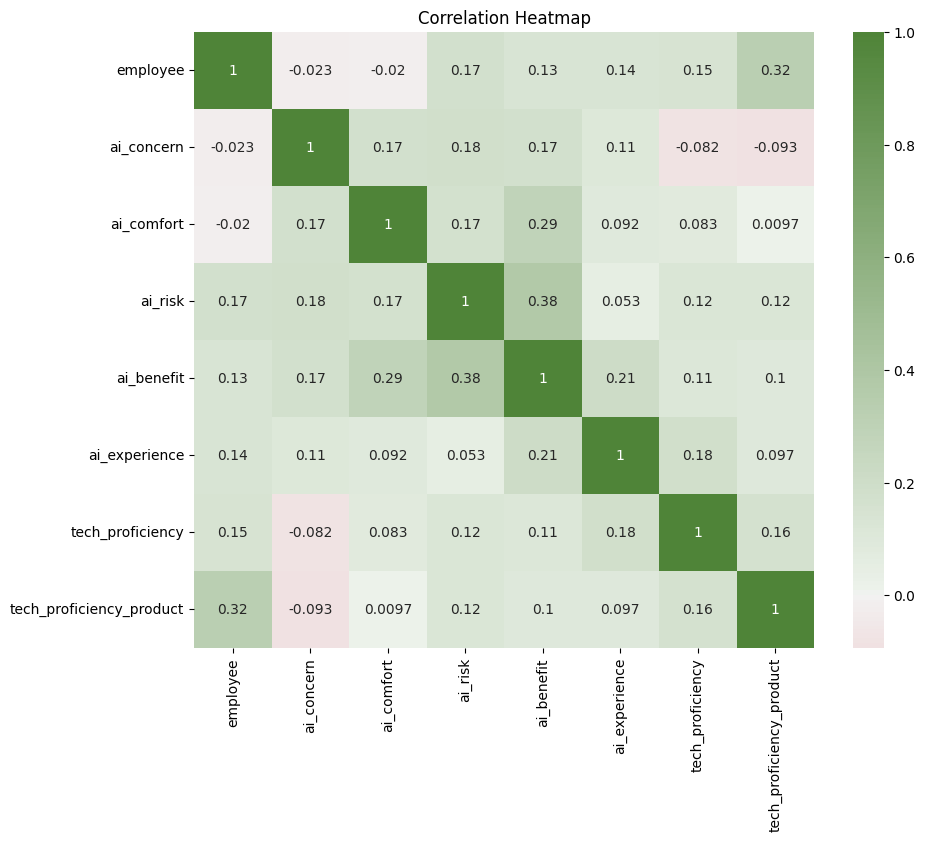

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = variable_cols.corr(method = 'spearman')
plt.figure(figsize=(10, 8))

# Create a custom diverging color palette where green = +1, white = 0, and red = -1
cmap = sns.diverging_palette(10, 120, as_cmap=True)

sns.heatmap(corr, annot = True, cmap=cmap, center=0) #alt cmap: 'coolwarm'
plt.title('Correlation Heatmap')
plt.show()

We now will look into the p-values for the correlations to understand the statistical significance of the correlation coefficient. We will only consider those deemed statistically significant and disregard the rest.

In [58]:
from scipy.stats import spearmanr
import numpy as np

ai_attitudes = ['ai_concern', 'ai_comfort', 'ai_risk', 'ai_benefit']
vars = ['employee', 'ai_experience', 'tech_proficiency', 'tech_proficiency_product']

def statistical_significance(df, vars, ai_attitudes):
  stat_significant_columns = {}

  for var in vars:
    for ai_attitude in ai_attitudes:
      curr_correlation = var.upper() + " vs. " + ai_attitude.upper()
      print(curr_correlation)

      # Drop rows with missing values from both columns
      subset_df = df[[ai_attitude, var]].dropna()

      # Compute Spearman correlation coefficient and p-value for the subset of data
      correlation_coefficient, p_value = spearmanr(subset_df[ai_attitude], subset_df[var])

      # Print correlation coefficient and p-value
      print("Spearman Correlation Coefficient:", correlation_coefficient)
      print("P-value:", p_value)

      # Interpret significance
      if not np.isnan(p_value) and p_value < 0.05:
          print("The correlation IS statistically significant.")
          print("\n")
          stat_significant_columns[curr_correlation] = (correlation_coefficient, p_value)
          #stat_significant_columns += [curr_correlation]
      else:
          print("The correlation is not statistically significant.")
          print("\n")

  return stat_significant_columns


sig_columns = statistical_significance(variable_cols, vars, ai_attitudes)

EMPLOYEE vs. AI_CONCERN
Spearman Correlation Coefficient: -0.023070241620374417
P-value: 0.6349091905008143
The correlation is not statistically significant.


EMPLOYEE vs. AI_COMFORT
Spearman Correlation Coefficient: -0.02005122136127983
P-value: 0.6834376151924612
The correlation is not statistically significant.


EMPLOYEE vs. AI_RISK
Spearman Correlation Coefficient: 0.17315528449470619
P-value: 0.008497618539023448
The correlation IS statistically significant.


EMPLOYEE vs. AI_BENEFIT
Spearman Correlation Coefficient: 0.13386365451752869
P-value: 0.006249501834376422
The correlation IS statistically significant.


AI_EXPERIENCE vs. AI_CONCERN
Spearman Correlation Coefficient: 0.10722869207344499
P-value: 0.027256491106375513
The correlation IS statistically significant.


AI_EXPERIENCE vs. AI_COMFORT
Spearman Correlation Coefficient: 0.09241883123378439
P-value: 0.059654003062203254
The correlation is not statistically significant.


AI_EXPERIENCE vs. AI_RISK
Spearman Correlation

In [59]:
# Print only the columns with statistically correlations
# Printing a dictionary using a loop and the items() method
for key, value in sig_columns.items():
    print(key, ":", value)

EMPLOYEE vs. AI_RISK : (0.17315528449470619, 0.008497618539023448)
EMPLOYEE vs. AI_BENEFIT : (0.13386365451752869, 0.006249501834376422)
AI_EXPERIENCE vs. AI_CONCERN : (0.10722869207344499, 0.027256491106375513)
AI_EXPERIENCE vs. AI_BENEFIT : (0.20757883224828852, 1.9756288525482696e-05)
TECH_PROFICIENCY vs. AI_BENEFIT : (0.11196363501265728, 0.02887881106631673)


#### Experimenting with Variables
Let's check what tweaking our variable on AI experience changes with our correlation coefficients. Especially given that this was our most significant and strongest correlation we had.

There are a few ways we could have "coded" this variable differently:


*   Having only two classes: 0 - has not used an AI tool & 1 - has used an AI tool
*   Adjusting the three classes: only have ChatGPT in the medium ai_experience category, 1, since it is the most popular by far compared to others I grouped in this bucket (DALLE, Midjourney)

Using approach 1 first:



In [56]:
# Create logic to scaffold out AI tool usage
low_ai_exp_logic = (df[none] == 1)
alt1_med_ai_exp_logic = (df[chatgpt] == 1)
alt1_high_ai_exp_logic = (df[medlm] == 1) | (df[bard] == 1) | (df[other] == 1) | (df[midjourney] == 1) | (df[dalle] == 1)

# Since this is multi-select, let usage of less mainstream AI tools trump usage of mainstream AI tools i.e. ChatGPT
# Meaning that a user that uses could be 1 or 2 in terms of ai_experience will end up being assigned value 2
df.loc[low_ai_exp_logic, 'ai_experience_alt1'] = 0
df.loc[alt1_med_ai_exp_logic, 'ai_experience_alt1'] = 1
df.loc[alt1_high_ai_exp_logic, 'ai_experience_alt1'] = 2

# Check the number of respondents are in each group
print("low ", len(df[df['ai_experience_alt1'] == 0]))
print("med ", len(df[df['ai_experience_alt1'] == 1]))
print("high ", len(df[df['ai_experience_alt1'] == 2]))

# Display the updated DataFrame
df.head()

low  105
med  307
high  221


,Response ID,Are you an existing LiveRamp Employee?,What LiveRamp products do you directly use? (select all that apply) - Connect/Activation,What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement,What LiveRamp products do you directly use? (select all that apply) - Advanced TV,What LiveRamp products do you directly use? (select all that apply) - Safe Haven,What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS,What LiveRamp products do you directly use? (select all that apply) - Data Plus Math,What LiveRamp products do you directly use? (select all that apply) - Data Marketplace,What LiveRamp products do you directly use? (select all that apply) - Onboarding,...,"How concerned are you, if at all, about potential biases in AI algorithms, particularly in the context of customer segmentation or personalized marketing? \n\n\n\nBiases in AI algorithms are the tendencies of the algorithms to produce results that are unfair, inaccurate, or discriminatory toward certain groups of people.",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,How comfortable or uncomfortable are you with the idea of AI providing suggestions within customers' LiveRamp accounts to improve their user experience?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,"Please share any additional thoughts or suggestions regarding data privacy, fairness, transparency, and ethical considerations in AI-powered products.",tech_proficiency,tech_proficiency_product,ai_experience,ai_experience_alt1,ai_experience_alt2
0,R_2DOCRsNhIAPNuo1,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,5.0,13.0,12.0,I think all basic tasks that can be sped up wi...,0.0,1.0,2.0,2.0,1.0
1,R_1roWjmvL2ZeH4vZ,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,3.0,12.0,10.0,NaN,2.0,1.0,1.0,1.0,1.0
2,R_1gin6fsy7L0BpD0,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,5.0,3.0,11.0,11.0,NaN,2.0,1.0,1.0,1.0,1.0
3,R_21pQK5Od5CQ6CSc,0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,5.0,4.0,13.0,12.0,"Overall, I'm a strong advocate for use of AI i...",NaN,2.0,1.0,1.0,1.0
4,R_wQTxmNjPg6z03ap,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,4.0,12.0,12.0,NaN,0.0,1.0,1.0,1.0,1.0


Using approach 2:

In [48]:
# Create logic to scaffold out AI tool usage
low_ai_exp_logic = (df[none] == 1)
alt2_high_ai_exp_logic = (df[medlm] == 1) | (df[bard] == 1) | (df[other] == 1) | (df[midjourney] == 1) | (df[dalle] == 1) | (df[chatgpt] == 1)

# Since this is multi-select, let usage of less mainstream AI tools trump usage of mainstream AI tools i.e. ChatGPT
# Meaning that a user that uses could be 1 or 2 in terms of ai_experience will end up being assigned value 2
df.loc[df[none] == 1, 'ai_experience_alt2'] = 0
df.loc[alt2_high_ai_exp_logic, 'ai_experience_alt2'] = 1

# Check the number of respondents are in each group
print("low ", len(df[df['ai_experience_alt2'] == 0]))
print("high ", len(df[df['ai_experience_alt2'] == 1]))

# Display the updated DataFrame
df.head()

low  105
high  528


,Response ID,Are you an existing LiveRamp Employee?,What LiveRamp products do you directly use? (select all that apply) - Connect/Activation,What LiveRamp products do you directly use? (select all that apply) - Connect/Measurement,What LiveRamp products do you directly use? (select all that apply) - Advanced TV,What LiveRamp products do you directly use? (select all that apply) - Safe Haven,What LiveRamp products do you directly use? (select all that apply) - Privacy Manager/ATS,What LiveRamp products do you directly use? (select all that apply) - Data Plus Math,What LiveRamp products do you directly use? (select all that apply) - Data Marketplace,What LiveRamp products do you directly use? (select all that apply) - Onboarding,...,"How concerned are you, if at all, about potential biases in AI algorithms, particularly in the context of customer segmentation or personalized marketing? \n\n\n\nBiases in AI algorithms are the tendencies of the algorithms to produce results that are unfair, inaccurate, or discriminatory toward certain groups of people.",Do you agree or disagree that the benefits of AI being used in LiveRamp outweigh the potential risks?,How comfortable or uncomfortable are you with the idea of AI providing suggestions within customers' LiveRamp accounts to improve their user experience?,How comfortable or uncomfortable are you with the idea of AI making decisions within customers' LiveRamp accounts to improve their user experience?,"Please share any additional thoughts or suggestions regarding data privacy, fairness, transparency, and ethical considerations in AI-powered products.",tech_proficiency,tech_proficiency_product,ai_experience,ai_experience_alt1,ai_experience_alt2
0,R_2DOCRsNhIAPNuo1,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,5.0,13.0,12.0,I think all basic tasks that can be sped up wi...,0.0,1.0,2.0,2.0,1.0
1,R_1roWjmvL2ZeH4vZ,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,3.0,12.0,10.0,NaN,2.0,1.0,1.0,1.0,1.0
2,R_1gin6fsy7L0BpD0,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,5.0,3.0,11.0,11.0,NaN,2.0,1.0,1.0,1.0,1.0
3,R_21pQK5Od5CQ6CSc,0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,5.0,4.0,13.0,12.0,"Overall, I'm a strong advocate for use of AI i...",NaN,2.0,1.0,1.0,1.0
4,R_wQTxmNjPg6z03ap,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,4.0,12.0,12.0,NaN,0.0,1.0,1.0,1.0,1.0


In [53]:
# Extract the columns from the first DataFrame
new_ai_exp_cols = df[['ai_experience_alt1', 'ai_experience_alt2']]

#Add these new columns to our correlation specific dataframe
variable_cols = pd.concat([variable_cols, new_ai_exp_cols], axis=1)
variable_cols.head()

,employee,ai_concern,ai_comfort,ai_risk,ai_benefit,ai_experience,tech_proficiency,tech_proficiency_product,ai_experience_alt1,ai_experience_alt2
0,0,4.0,12.0,NaN,5.0,1.0,0.0,1.0,2.0,1.0
1,0,3.0,10.0,NaN,3.0,1.0,2.0,1.0,1.0,1.0
2,0,1.0,11.0,NaN,3.0,1.0,2.0,1.0,1.0,1.0
3,0,2.0,12.0,NaN,4.0,1.0,NaN,2.0,1.0,1.0
4,0,5.0,12.0,NaN,4.0,1.0,0.0,1.0,1.0,1.0


Print out the statistical significance and correlation coefficients for the AI experience variable alternatives

In [60]:
ai_exp_vars = statistical_significance(variable_cols, ['ai_experience','ai_experience_alt1','ai_experience_alt2'], ai_attitudes)

AI_EXPERIENCE vs. AI_CONCERN
Spearman Correlation Coefficient: 0.10722869207344499
P-value: 0.027256491106375513
The correlation IS statistically significant.


AI_EXPERIENCE vs. AI_COMFORT
Spearman Correlation Coefficient: 0.09241883123378439
P-value: 0.059654003062203254
The correlation is not statistically significant.


AI_EXPERIENCE vs. AI_RISK
Spearman Correlation Coefficient: 0.053359898523700516
P-value: 0.4205843826662399
The correlation is not statistically significant.


AI_EXPERIENCE vs. AI_BENEFIT
Spearman Correlation Coefficient: 0.20757883224828852
P-value: 1.9756288525482696e-05
The correlation IS statistically significant.


AI_EXPERIENCE_ALT1 vs. AI_CONCERN
Spearman Correlation Coefficient: 0.08675561255493076
P-value: 0.07434252794443395
The correlation is not statistically significant.


AI_EXPERIENCE_ALT1 vs. AI_COMFORT
Spearman Correlation Coefficient: 0.07879788467363624
P-value: 0.10853165094098614
The correlation is not statistically significant.


AI_EXPERIENC

In [61]:
# Printing a dictionary using a loop and the items() method
for key, value in ai_exp_vars.items():
    print(key, ":", value)

AI_EXPERIENCE vs. AI_CONCERN : (0.10722869207344499, 0.027256491106375513)
AI_EXPERIENCE vs. AI_BENEFIT : (0.20757883224828852, 1.9756288525482696e-05)
AI_EXPERIENCE_ALT1 vs. AI_BENEFIT : (0.25301337785471456, 1.692405039016389e-07)
AI_EXPERIENCE_ALT2 vs. AI_BENEFIT : (0.14608654323779194, 0.0028203821565677247)
